In [120]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime 
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from statsmodels.tsa.arima.model import ARIMA
import itertools
import statsmodels.tsa.api as tsa

In [89]:
#Download the prices
ticker = '^GSPC'
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2021, 1, 1)
SP_prices = yf.download(ticker, start=start, end=end, interval='1mo').Close


[*********************100%***********************]  1 of 1 completed


In [90]:
sample = SP_prices.resample('M').last()

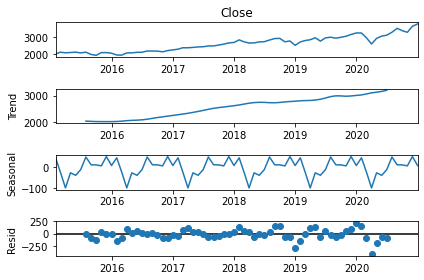

In [91]:
seasonal_decompose(sample, period=12, model="additive").plot()
plt.show()

In [124]:
# split dependent and independent variable
X = clean_monthly_returns['^GSPC']
y = clean_monthly_returns[stock]

In [125]:
# Add a constant to the independent value
X1 = sm.add_constant(X)

In [126]:
# make regression model 
model = sm.OLS(y, X)

In [127]:
# fit model and print results
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  GOOGL   R-squared (uncentered):                   0.538
Model:                            OLS   Adj. R-squared (uncentered):              0.537
Method:                 Least Squares   F-statistic:                              2115.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):                   4.91e-307
Time:                        13:32:37   Log-Likelihood:                          5546.5
No. Observations:                1820   AIC:                                 -1.109e+04
Df Residuals:                    1819   BIC:                                 -1.109e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------